### Author : Akepati Sri VIshnu Vardhan Reddy

### Prediction using Unsupervised ML
 - Problem Statement:
    - From the given ‘Iris’ dataset, predict the optimum number of clusters
      and represent it visually. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
dataset = pd.read_csv('iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


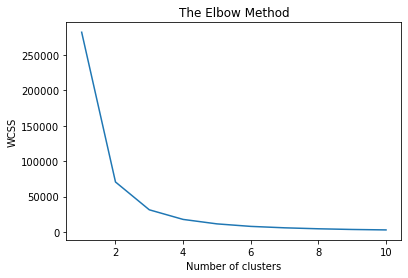

In [3]:
# Finding the optimum number of clusters for k-means classification
# wcss = with in clusters sum of squares matrix

x = dataset.iloc[:,[0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Observe the Elbow Curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From above plot we can observe the optimum number of clusters where the elbow occurs i.e., 3

In [4]:
# Creating a KMeans Classifier
classifier = KMeans(n_clusters = 3,init = 'k-means++',random_state = 0)
y_kmeans = classifier.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

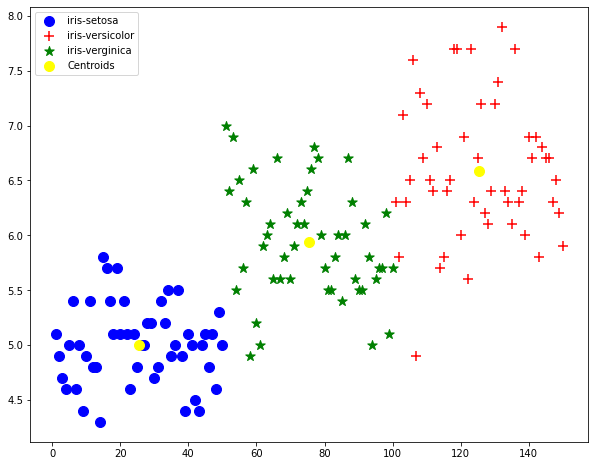

In [5]:
plt.subplots(figsize=(10,8))
plt.scatter(x[y_kmeans == 0 , 0],x[y_kmeans == 0 , 1],s=100,c = 'blue',marker='o',label = 'iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0],x[y_kmeans == 1 , 1],s=100,c = 'red',marker = '+',label = 'iris-versicolor')
plt.scatter(x[y_kmeans == 2 , 0],x[y_kmeans == 2 , 1],s=100,c = 'green',marker='*',label = 'iris-verginica')
#plot cenroids
plt.scatter(classifier.cluster_centers_[:,0], classifier.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

#### Therfore, Optimum number of clusters are 3